In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r"C:\Users\ryani\Desktop\Data Analyst COURSE\Data Immersion\E6 - Dashboards and Analytics\UN_DATASET"

In [4]:
df_UN = pd.read_csv(os.path.join(path, '03 Prepared Data', 'UN_df_cleaned.csv'))
df_UN

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,143,4,NaN,AFG,AF,4,4,Country/Area,5501,Afghanistan,...,274.4609,224.8054,101.7436,110.5445,92.7252,198.4914,221.6256,175.9458,-44.089,-1.034
1,143,4,NaN,AFG,AF,4,4,Country/Area,5501,Afghanistan,...,278.3373,229.1277,103.7876,112.5256,94.8531,201.1085,224.2414,178.7562,-48.958,-1.181
2,143,4,NaN,AFG,AF,4,4,Country/Area,5501,Afghanistan,...,288.3504,233.7682,108.9153,120.5091,97.0285,207.2249,233.3923,181.8401,-647.402,-15.954
3,143,4,NaN,AFG,AF,4,4,Country/Area,5501,Afghanistan,...,434.9700,291.2585,187.4871,243.1744,126.7582,316.9767,388.2573,239.8960,-548.784,-13.719
4,143,4,NaN,AFG,AF,4,4,Country/Area,5501,Afghanistan,...,395.8878,275.1640,160.4519,201.7709,116.2911,284.3806,344.7921,221.3018,143.634,3.676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,83,716,NaN,ZWE,ZW,716,4,Country/Area,910,Zimbabwe,...,430.3308,353.8247,209.8813,234.9024,190.9142,347.4430,389.2870,313.5975,-103.107,-6.752
2316,83,716,NaN,ZWE,ZW,716,4,Country/Area,910,Zimbabwe,...,427.9629,360.0455,211.7529,232.9385,195.8469,349.1253,385.7373,319.5930,-117.758,-7.833
2317,83,716,NaN,ZWE,ZW,716,4,Country/Area,910,Zimbabwe,...,439.0037,374.3302,220.8267,241.7148,205.0532,360.9658,395.5178,333.0355,-128.241,-8.658
2318,83,716,NaN,ZWE,ZW,716,4,Country/Area,910,Zimbabwe,...,445.2774,386.7537,229.5361,246.6502,216.6720,369.5281,400.3307,344.6680,-140.181,-9.601


In [9]:
df_2020 = df_UN[df_UN['Time'] == 2020]
df_2020

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
4,143,4,NaN,AFG,AF,4,4,Country/Area,5501,Afghanistan,...,395.8878,275.1640,160.4519,201.7709,116.2911,284.3806,344.7921,221.3018,143.634,3.676
15,211,8,NaN,ALB,AL,8,4,Country/Area,925,Albania,...,124.3841,60.8120,33.6223,46.4676,21.5870,81.9411,114.0377,51.4945,-16.680,-5.808
24,95,12,NaN,DZA,DZ,12,4,Country/Area,912,Algeria,...,140.2547,111.2370,44.6584,49.3664,39.6626,103.0236,115.6802,89.4811,-10.798,-0.245
35,318,16,30.0,ASM,AS,16,4,Country/Area,957,American Samoa,...,222.4886,131.4738,85.5955,109.2409,60.3665,168.7200,212.1297,121.6719,-0.653,-13.123
44,212,20,NaN,AND,AD,20,4,Country/Area,925,Andorra,...,118.3212,58.2937,36.1310,48.3519,23.3027,78.3671,103.1614,51.6024,0.572,7.394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,163,704,NaN,VNM,VN,704,4,Country/Area,920,Viet Nam,...,204.7657,86.1982,67.3834,99.5223,34.1841,121.7586,175.9670,66.6094,-6.457,-0.066
2285,326,876,2.0,WLF,WF,876,4,Country/Area,957,Wallis and Futuna Islands,...,90.4664,92.2328,28.4194,26.2516,30.1834,77.4316,80.7712,74.5675,-0.071,-6.112
2294,182,887,NaN,YEM,YE,887,4,Country/Area,922,Yemen,...,305.2686,190.2223,108.9115,143.9324,71.4124,210.5138,265.1054,151.9646,-97.982,-2.712
2304,82,894,NaN,ZMB,ZM,894,4,Country/Area,910,Zambia,...,353.2085,254.5448,134.8540,161.8714,107.3523,251.2828,299.6490,203.3872,8.156,0.428


In [11]:
df_2020.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'],
      dtype='object')

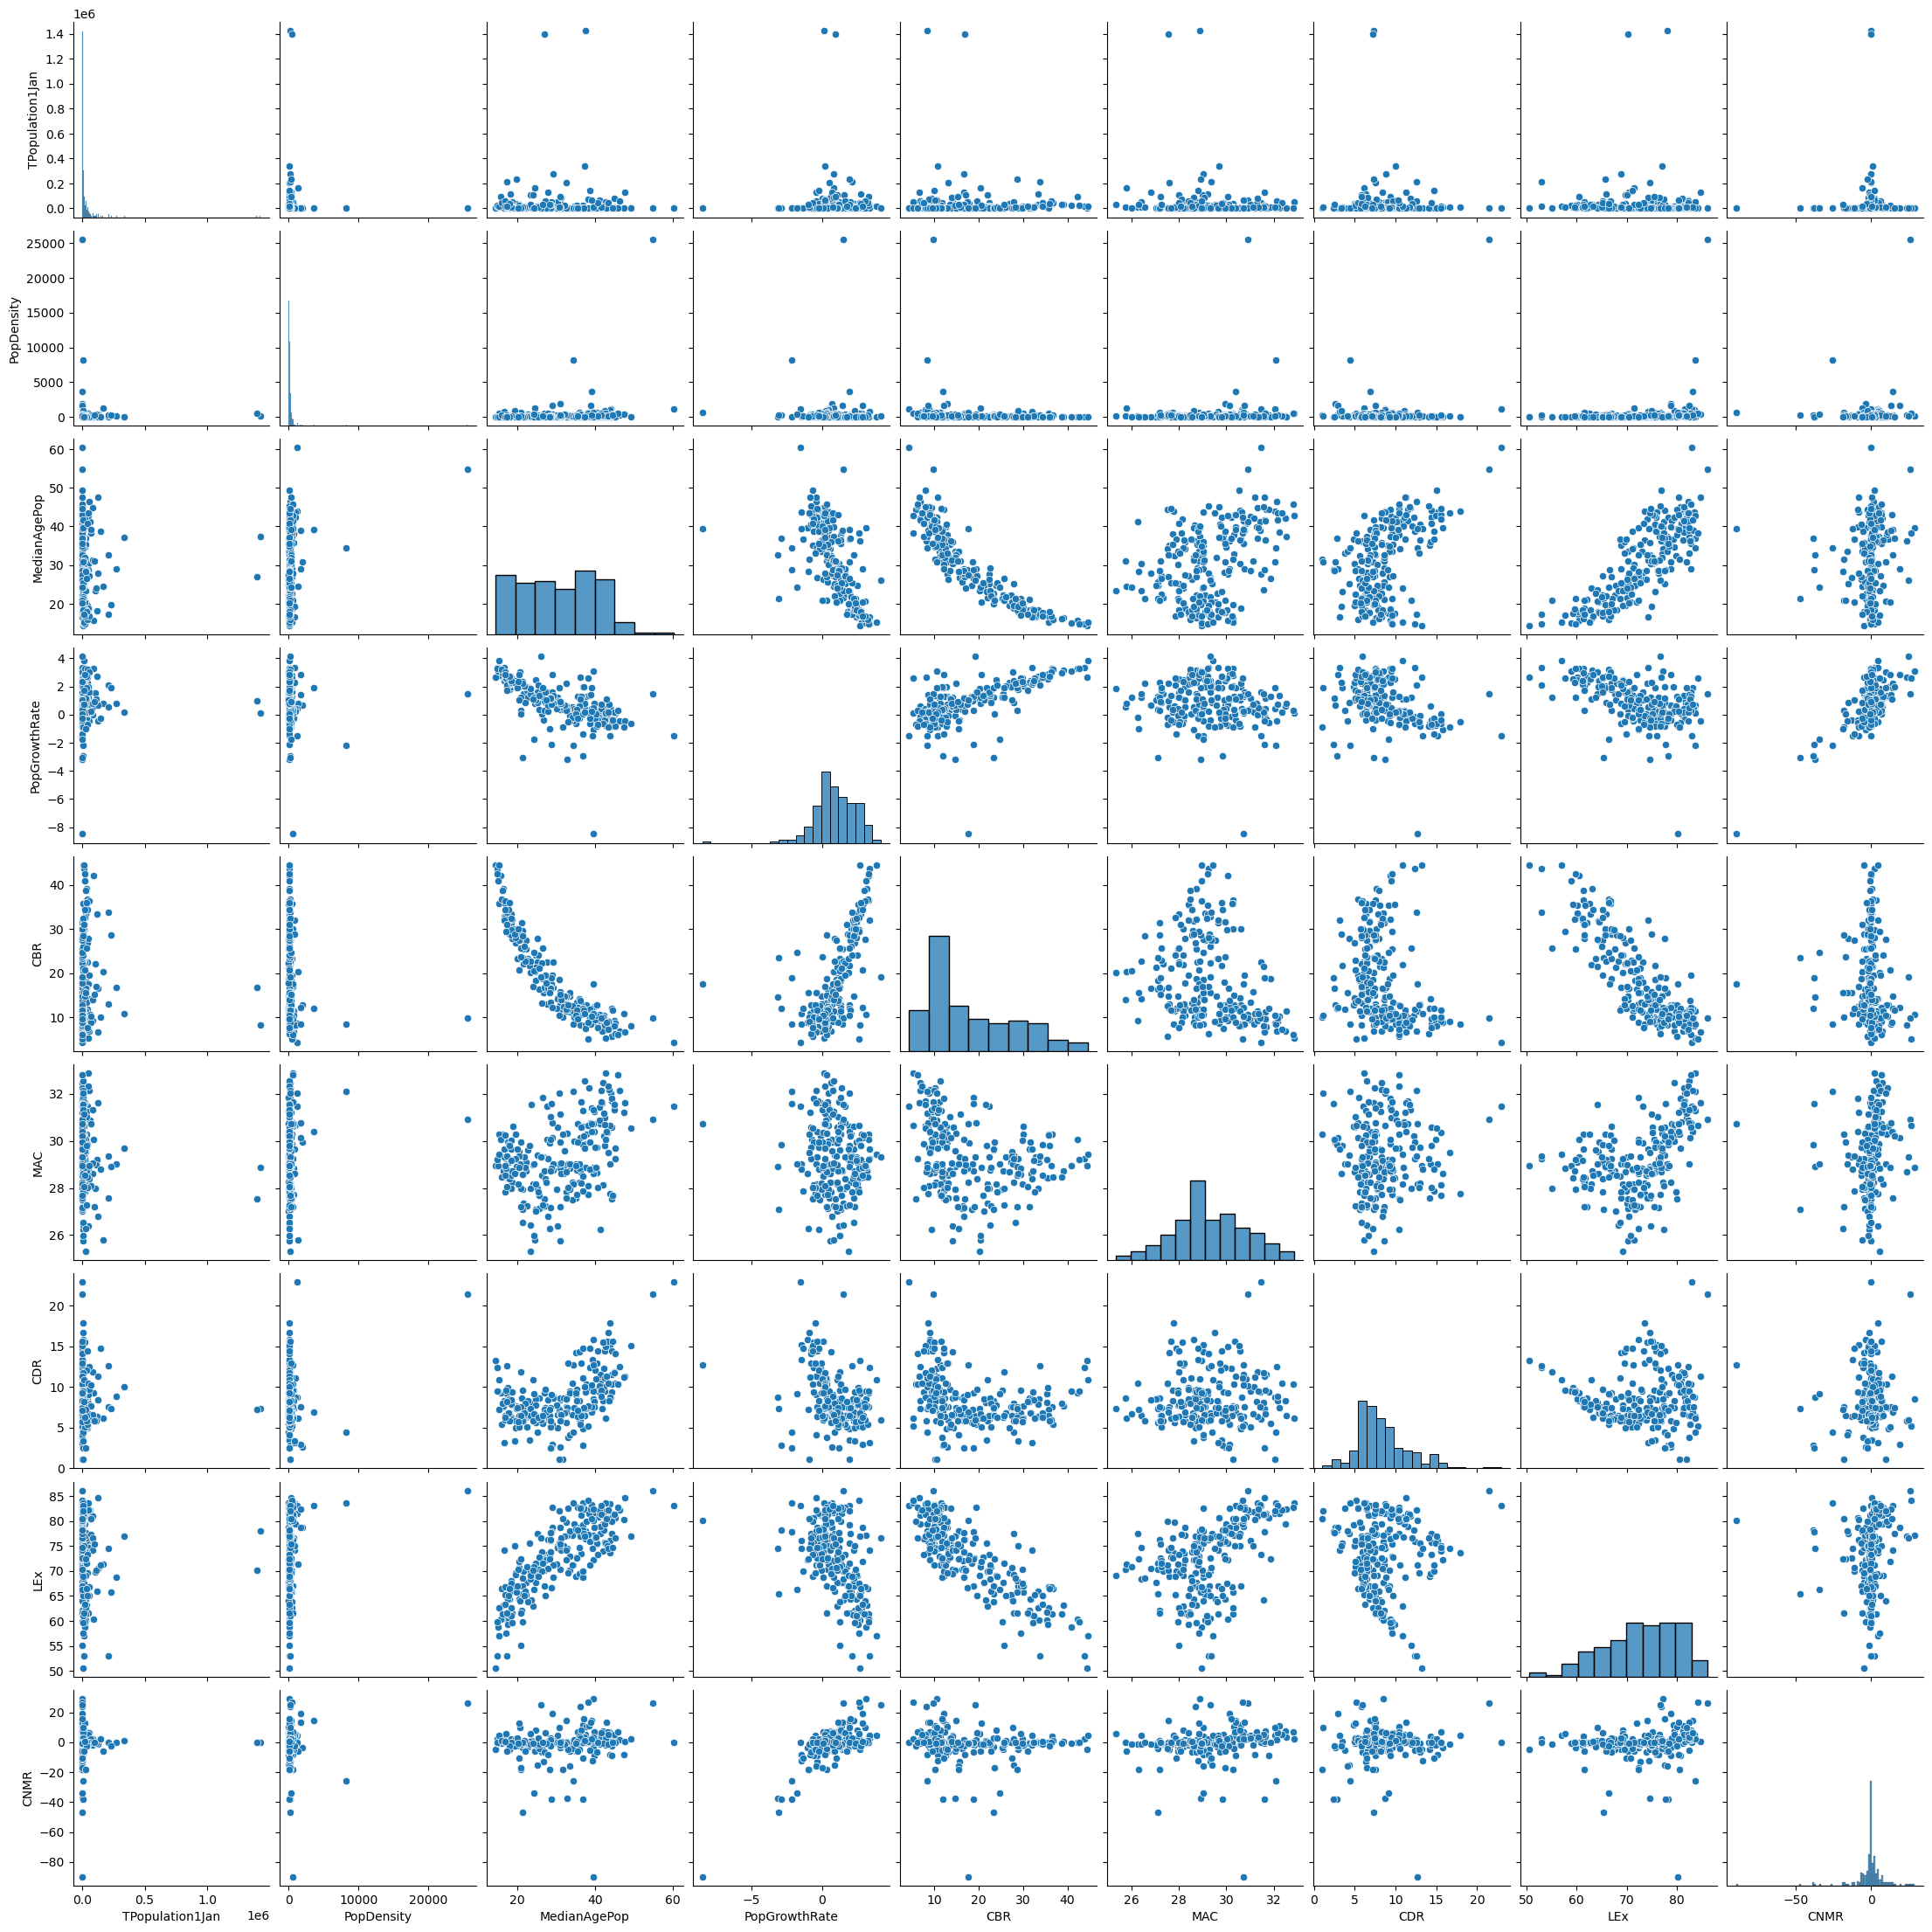

In [12]:
df_pairplot = df_2020 [['TPopulation1Jan', 'PopDensity', 'MedianAgePop', 'PopGrowthRate', 'CBR','MAC', 'CDR', 'LEx', 'CNMR']]
pairplot = sns.pairplot(df_pairplot)

## The Net Migration Rate (CNMR) and PopulationGrowthRate looks good

R² value: 0.4336
Slope: 0.0897
Intercept: 0.9648
Mean Squared Error: 1.1930


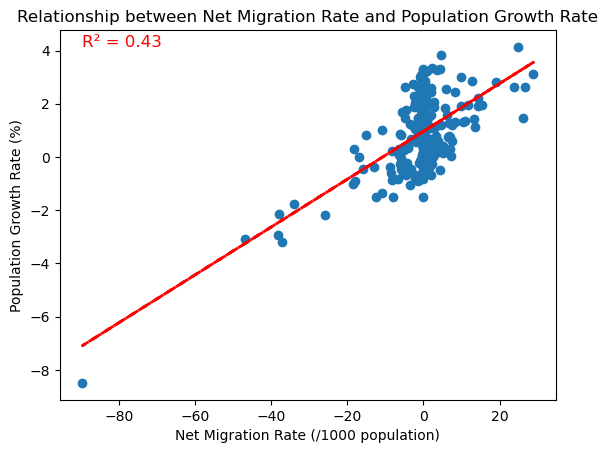

In [34]:
# Create scatter plot of Net Migration Rate vs Population Growth Rate
plt.scatter(df_2020['CNMR'], df_2020['PopGrowthRate'])

# Add trendline to visualize the relationship
x = df_2020['CNMR']  # Net Migration Rate as independent variable
y = df_2020['PopGrowthRate']  # Population Growth Rate as dependent variable
z = np.polyfit(x, y, 1)  # Calculate coefficients for linear fit (degree=1)
p = np.poly1d(z)  # Create polynomial function from coefficients
plt.plot(x, p(x), "r--", linewidth=2)  # Add red dashed trendline to the plot

# Calculate R² (coefficient of determination) to quantify correlation strength
r_squared = r2_score(y, p(x))
print(f"R² value: {r_squared:.4f}")  # Print R² value with 4 decimal places

# Calculate and print slope information
slope = z[0]
intercept = z[1]
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

# Calculate and print Mean Squared Error
mse = mean_squared_error(y, p(x))
print(f"Mean Squared Error: {mse:.4f}")

# Add descriptive labels and title to the plot
plt.xlabel('Net Migration Rate (/1000 population)')
plt.ylabel('Population Growth Rate (%)')
plt.title('Relationship between Net Migration Rate and Population Growth Rate')
plt.text(x.min(), y.max(), f'R² = {r_squared:.2f}', color='red', fontsize=12)  # Add R² value to top-left of plot


plt.show()  # Display the completed plot

In [15]:
x = df_2020['CNMR'].values.reshape(-1,1)
y = df_2020['PopGrowthRate'].values.reshape(-1,1)

In [16]:
x

array([[ 3.6760e+00],
       [-5.8080e+00],
       [-2.4500e-01],
       [-1.3123e+01],
       [ 7.3940e+00],
       [ 2.2600e-01],
       [ 1.8860e+00],
       [ 0.0000e+00],
       [ 6.0000e-03],
       [-4.5130e+00],
       [ 0.0000e+00],
       [ 1.7270e+00],
       [ 4.4390e+00],
       [ 1.0500e-01],
       [ 0.0000e+00],
       [-3.4040e+00],
       [-6.0280e+00],
       [ 0.0000e+00],
       [-3.6310e+00],
       [ 3.7930e+00],
       [ 1.6400e-01],
       [ 1.3200e-01],
       [ 4.4420e+00],
       [ 3.7300e-01],
       [-3.9500e-01],
       [ 2.8870e+01],
       [-8.1350e+00],
       [-4.7890e+00],
       [-3.7600e-01],
       [ 2.3913e+01],
       [ 1.0330e+00],
       [ 4.3510e+00],
       [-2.6400e-01],
       [-8.0800e-01],
       [-6.5320e+00],
       [ 0.0000e+00],
       [-3.7700e-01],
       [ 6.7220e+00],
       [ 1.1793e+01],
       [-4.9230e+00],
       [ 2.1250e+00],
       [ 1.3440e+00],
       [-6.4000e-02],
       [-8.9700e-01],
       [ 4.4860e+00],
       [-2

In [17]:
y

array([[ 3.272],
       [-0.435],
       [ 1.62 ],
       [-0.376],
       [ 0.597],
       [ 3.173],
       [ 0.593],
       [ 0.553],
       [ 0.336],
       [-0.664],
       [ 0.036],
       [ 0.683],
       [ 0.436],
       [ 0.551],
       [ 0.162],
       [ 0.682],
       [ 0.813],
       [ 0.181],
       [-1.053],
       [ 0.278],
       [ 1.295],
       [ 2.629],
       [ 0.438],
       [ 0.704],
       [ 1.077],
       [ 3.115],
       [-1.496],
       [ 1.449],
       [ 0.512],
       [ 2.637],
       [ 1.04 ],
       [-0.506],
       [ 2.415],
       [ 2.786],
       [ 0.071],
       [ 1.607],
       [ 2.696],
       [ 0.804],
       [ 1.944],
       [ 2.63 ],
       [ 3.355],
       [ 0.405],
       [ 0.094],
       [-0.144],
       [ 1.197],
       [ 2.014],
       [ 2.417],
       [-3.177],
       [ 0.6  ],
       [ 2.473],
       [-0.813],
       [-0.222],
       [ 0.342],
       [ 1.189],
       [-0.139],
       [ 0.361],
       [ 3.287],
       [ 0.294],
       [ 1.471

# Split the data into two sets: a training set and a test set.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Run a linear regression on the data

In [19]:
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
regression.fit(x_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(x_test)

Text(0.5, 1.0, 'Relationship between Net Migration Rate and Population Growth Rate')

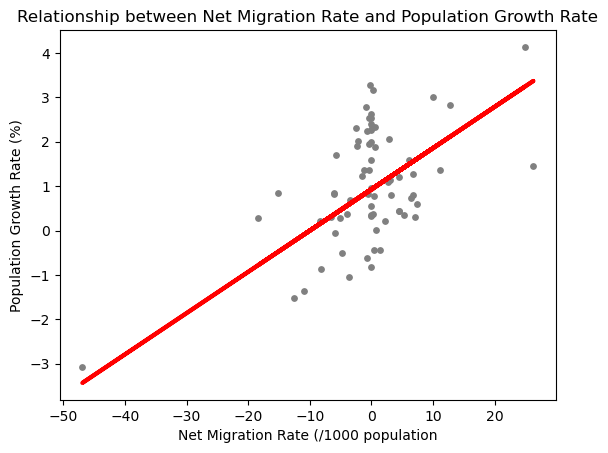

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Relationship between Net Migration Rate and Population Growth Rate')
plot_test.xlabel('No. of shops')
plot_test.ylabel('Price per unit')


# Add labels and title
plt.xlabel('Net Migration Rate (/1000 population)')
plt.ylabel('Population Growth Rate (%)')
plt.title('Relationship between Net Migration Rate and Population Growth Rate')

# Write your own interpretation of how well the line appears to fit the data in a markdown cell.

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.09292114]]
Mean squared error:  1.17388141332781
R2 score:  0.27166716486229536


In [25]:
y_predicted

array([[ 1.12782285],
       [-0.77594557],
       [ 0.39365288],
       [ 0.94402482],
       [ 3.36852334],
       [ 0.16850495],
       [ 0.70215108],
       [-0.08247506],
       [ 0.86457725],
       [ 0.70772635],
       [ 0.92887868],
       [ 0.9162414 ],
       [ 0.89840054],
       [ 0.15019948],
       [ 1.17391174],
       [ 0.9294362 ],
       [ 0.31875844],
       [ 0.9698569 ],
       [ 0.92887868],
       [ 0.94987886],
       [ 0.48638819],
       [ 1.34572293],
       [ 0.86559938],
       [ 1.56204336],
       [ 0.81309893],
       [ 1.52598995],
       [ 1.55349461],
       [ 0.98909158],
       [ 0.92887868],
       [ 1.19509776],
       [ 1.34135564],
       [ 1.20829256],
       [ 0.3853829 ],
       [ 3.24317271],
       [ 0.95563997],
       [ 0.95982142],
       [ 0.3589933 ],
       [ 0.591482  ],
       [ 0.6125751 ],
       [ 0.92321049],
       [ 0.92887868],
       [ 0.78187743],
       [ 1.00293683],
       [-0.23551619],
       [ 2.11659675],
       [ 0

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.208,1.127823
1,0.292,-0.775946
2,1.709,0.393653
3,2.304,0.944025
4,1.453,3.368523
5,-0.869,0.168505
6,2.305,0.702151
7,-1.357,-0.082475
8,2.251,0.864577
9,1.894,0.707726


## The R2 values are not great with the real data being 0.43 and the test data giving an R2 of 0.27

In [27]:
# Predict.

y_predicted_train = regression.predict(x_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.09292114]]
Mean squared error:  1.205067720786086
R2 score:  0.47837970158405074


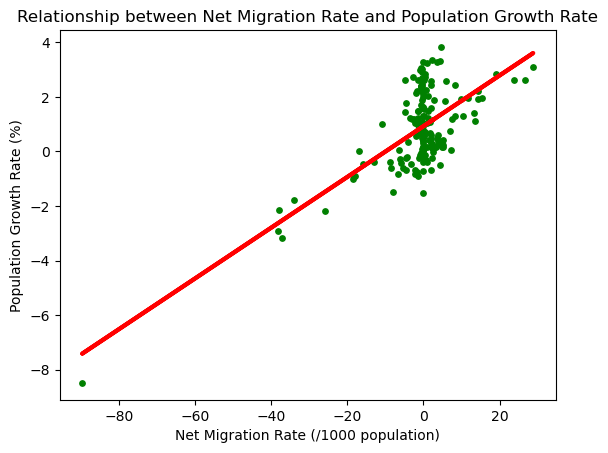

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Relationship between Net Migration Rate and Population Growth Rate')
plot_test.xlabel('Net Migration Rate (/1000 population)')
plot_test.ylabel('Population Growth Rate (%)')
plot_test.show()

## I think this trained well. The R2 values are fairly similar when comparing the original data. It also visually fits well, and the slopes are both 0.09. 